In [184]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz

In [185]:
def binary_to_string(binary_string):
    
    # Split the binary string into individual binary codes
    binary_values = binary_string.split()
    print('binary values: is: ',binary_values)
    # Convert each binary code to the corresponding character
    ascii_characters = [chr(int(b, 2)) for b in binary_values]
    # Join the characters to form the original string
    converted_string = ''.join(ascii_characters)
    return converted_string

# Example usage
binary_string1 = "01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001"
print('binary_string1 is: ', binary_string1)

converted_string_1 = binary_to_string(binary_string1)
print(f"converted_string_1 is: {converted_string_1}")

binary_string1 is:  01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001
binary values: is:  ['01001000', '01100101', '01101100', '01101100', '01101111', '00101100', '00100000', '01010111', '01101111', '01110010', '01101100', '01100100', '00100001']
converted_string_1 is: Hello, World!


In [186]:
#input_string_1 = "Hello, World!"
input_string_1 = "ABC"

binary_converted_1 = ''.join(format(ord(char), '08b') for char in input_string_1)
#binary_converted_1 = "".join(f"{ord(i):08b}" for i in input_string_1)

print("binary_converted_1 is:", binary_converted_1)
print(type(binary_converted_1))

lengthofbinary_converted_1 = len(binary_converted_1)
print('Length of binary_converted_1 is: ', lengthofbinary_converted_1)

binary_converted_1 is: 010000010100001001000011
<class 'str'>
Length of binary_converted_1 is:  24


binary_converted_1_int_list is:  [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
<class 'list'>
binary_converted_1_ndarray is: [0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1]
<class 'numpy.ndarray'>


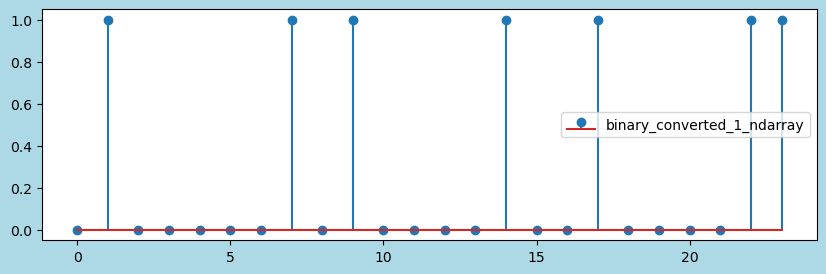

In [187]:
binary_converted_1_int_list = [int(i) for i in binary_converted_1]
print('binary_converted_1_int_list is: ', binary_converted_1_int_list)
print(type(binary_converted_1_int_list))

binary_converted_1_ndarray = np.array(binary_converted_1_int_list)
print('binary_converted_1_ndarray is:', binary_converted_1_ndarray)
print(type(binary_converted_1_ndarray))

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.stem(binary_converted_1_ndarray, ".-", label = 'binary_converted_1_ndarray')
ax1_1.legend()

repetitions1 is:  4.0
[0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Size of TX Analog values 1 is:  496
<class 'numpy.ndarray'>


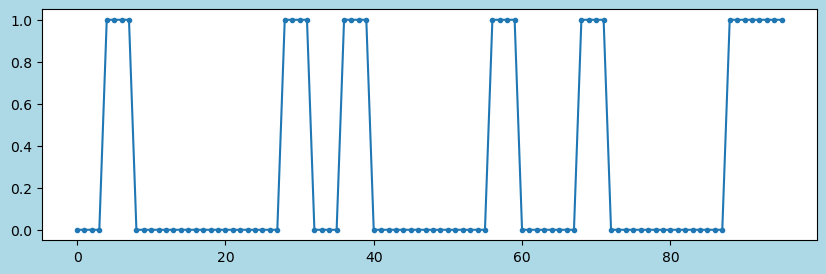

In [188]:
# Convert Symbol to analog signal using 'repeat' function

samplerate = 2 ** 2
numberofpointspersymbol = 2 ** 0
repetitions1 = samplerate / numberofpointspersymbol
print('repetitions1 is: ', repetitions1)

TX_analog_values1 = np.repeat(binary_converted_1_ndarray, repetitions1)
print(TX_analog_values1)
print('Size of TX Analog values 1 is: ', sys.getsizeof(TX_analog_values1))

#TX_analog_float1 = [int(TX_analog_values1)]

print(type(TX_analog_values1))

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(TX_analog_values1, ".-")


### Apply Convolution

[ 0.          0.          0.          0.          0.94111111  1.05534396
  0.94806458  1.04865976  0.01337539 -0.01285071  0.01233976 -0.01184231
  0.01135814 -0.01088702  0.01042873 -0.00998305  0.00954975 -0.00912862
  0.00871945 -0.00832202  0.00793612 -0.00756154  0.00719808 -0.00684552
  0.00650366 -0.0061723   0.00585125 -0.0055403   0.94635036  1.05039604
  0.95273068  1.04426613  0.01750568 -0.01672661  0.01597004 -0.01523556
  0.95563387  1.04151271  0.96122519  1.03614929  0.02525579 -0.02412075
  0.02301876 -0.0219492   0.02091148 -0.019905    0.01892917 -0.01798339
  0.01706709 -0.01617969  0.01532063 -0.01448933  0.01368525 -0.01290783
  0.01215652 -0.01143078  0.95184119  1.04529007  0.95746627  1.0398868
  0.02154258 -0.02043457  0.01936224 -0.01832488  0.01732175 -0.01635216
  0.01541541 -0.0145108   0.95474875  1.04254869  0.96004758  1.03745957
  0.02382156 -0.02257099  0.02136167 -0.02019273  0.01906331 -0.01797258
  0.0169197  -0.01590386  0.01492423 -0.01398001  0.

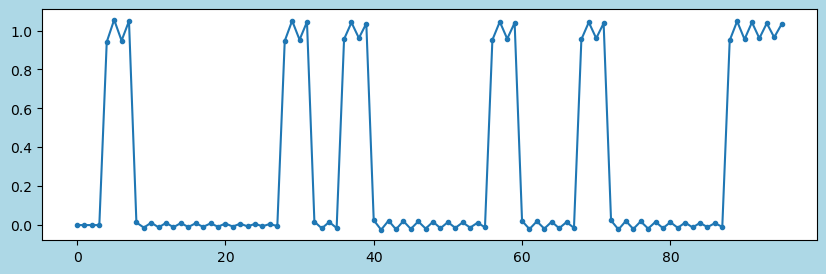

In [189]:
order = 6
normal_cutoff = 0.99 # 0 to 1

b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

filtered_data1 = signal.lfilter(b, a, TX_analog_values1) # scipy.signal.lfilter
print(filtered_data1)

print('Size of filtered_gaussian is: ', sys.getsizeof(filtered_data1))

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(filtered_data1, ".-")


Size of filtered_gaussian is:  904


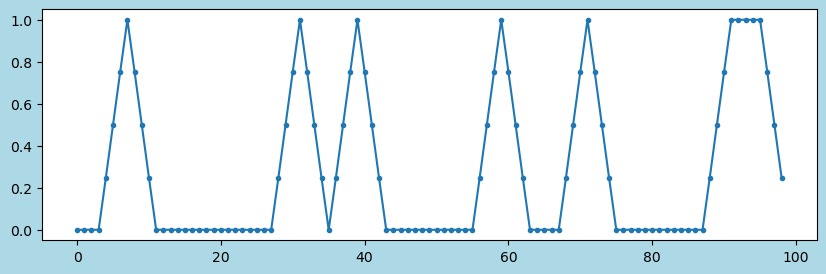

In [190]:
win1 = signal.windows.gaussian(4, std=7)

filtered_gaussian = signal.convolve(TX_analog_values1,win1, mode='full') / sum(win1)

fig1 = plt.figure(figsize = (10,3), facecolor='lightblue')
ax1_1 = fig1.add_subplot(1, 1, 1)
ax1_1.plot(filtered_gaussian, ".-")

print('Size of filtered_gaussian is: ', sys.getsizeof(filtered_gaussian))

In [191]:


#splitarray1 = np.hsplit(TX_analog_values1, lengthofbinary_converted_1) # As is
splitarray1 = np.hsplit(filtered_data1, lengthofbinary_converted_1) # filtered
#splitarray1 = np.hsplit(filtered_gaussian, lengthofbinary_converted_1) # filtered

print('splitarray1 is: ', splitarray1)
print(type(splitarray1))
print('Size of splitarray1 is: ', sys.getsizeof(type(splitarray1)))

mean_ndarray1 = np.ones(lengthofbinary_converted_1)
#print('mean_ndarray1 is: ',mean_ndarray1)

for ii in range(lengthofbinary_converted_1):
    #print(splitarray1[ii])
    mean_ndarray1[ii] = int(np.mean(splitarray1[ii]))

print('mean_ndarray1 is: ',mean_ndarray1)
print(type(mean_ndarray1))

list_afterconvolution = mean_ndarray1.tolist()
list_afterconvolution_cleaned = list(map(int, list_afterconvolution))

print(list_afterconvolution_cleaned)
print(type(list_afterconvolution_cleaned))

string1_afterconvolution = ''.join(str(x) for x in list_afterconvolution_cleaned)

print('string1_afterconvolution is : ', string1_afterconvolution)
print(type(string1_afterconvolution))


def splitAt(w,n):
    for i in range(0,len(w),n):
        yield w[i:i+n]

string1_afterconvolution_spaceadded = " ".join(splitAt(string1_afterconvolution,8))

print(string1_afterconvolution_spaceadded)

regenerated_string_2 = binary_to_string(string1_afterconvolution_spaceadded)
print('The regenerated_string_1 is: ', regenerated_string_2)


splitarray1 is:  [array([0., 0., 0., 0.]), array([0.94111111, 1.05534396, 0.94806458, 1.04865976]), array([ 0.01337539, -0.01285071,  0.01233976, -0.01184231]), array([ 0.01135814, -0.01088702,  0.01042873, -0.00998305]), array([ 0.00954975, -0.00912862,  0.00871945, -0.00832202]), array([ 0.00793612, -0.00756154,  0.00719808, -0.00684552]), array([ 0.00650366, -0.0061723 ,  0.00585125, -0.0055403 ]), array([0.94635036, 1.05039604, 0.95273068, 1.04426613]), array([ 0.01750568, -0.01672661,  0.01597004, -0.01523556]), array([0.95563387, 1.04151271, 0.96122519, 1.03614929]), array([ 0.02525579, -0.02412075,  0.02301876, -0.0219492 ]), array([ 0.02091148, -0.019905  ,  0.01892917, -0.01798339]), array([ 0.01706709, -0.01617969,  0.01532063, -0.01448933]), array([ 0.01368525, -0.01290783,  0.01215652, -0.01143078]), array([0.95184119, 1.04529007, 0.95746627, 1.0398868 ]), array([ 0.02154258, -0.02043457,  0.01936224, -0.01832488]), array([ 0.01732175, -0.01635216,  0.01541541, -0.0145108 ]